In [1]:
import pandas as pd
import numpy as np

In [2]:
#Importando datasets
itens_do_pedido = pd.read_csv('Datasets/olist_order_items_dataset.csv', sep=',', encoding='iso-8859-1')
reviews = pd.read_csv('Datasets/olist_order_reviews_dataset.csv', sep=',', encoding='iso-8859-1')

In [3]:
#Relacionando dois dataframes
rev_item1 = pd.merge(itens_do_pedido, reviews, on='order_id', how='inner')
rev_item1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,9185f849f32d82e216a4e025e0c50f5c,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
112368,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,be803f6a93d64719fd685c1cc610918a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
112369,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,dbdd81cd59a1a9f94a10a990b4d48dce,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
112370,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,fba117c9ac40d41ca7be54741f471303,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


In [4]:
#TOP 10 MELHORES SELLERS (COM MAIS REVIEWS POSITIVOS)
#Esta foi a primeira forma encontrada de se fazer o desafio

In [5]:
# Agrupando os dados pelo ID do vendedor e calcular a média da pontuação de avaliação
seller_scores = rev_item1.groupby('seller_id')['review_score'].mean()

# Ordenando os vendedores pela pontuação média em ordem decrescente
top_sellers = seller_scores.sort_values(ascending=False)

# Selecionando os top 10 vendedores
top_10_sellers = top_sellers.head(10)

print(top_10_sellers)

seller_id
1cd9e0cc1839d55516843def5600816d    5.0
9fbd5666d8618fa571c4230fafa09bd6    5.0
d3891911c2feae53c52fea2bd14054e5    5.0
702835e4b785b67a084280efca355756    5.0
a20d8058c866dbaeca014d2cd20ac62e    5.0
a213f1bd6458f4a158f3746cb2514559    5.0
1d953075c2f0dd990bacf27b83b330f1    5.0
404e1ba01358af4cd63f679b2c4d1fa1    5.0
a2b911e9ad40dc7d61c142a4683e2d85    5.0
70126eecc6aa1274392a1743866e9678    5.0
Name: review_score, dtype: float64


In [6]:
# Transformando o dataframe que contém series de score em dataframe com colunas
score = pd.DataFrame(top_10_sellers).reset_index()
score.columns = ['seller_id', 'review_score']

score

,seller_id,review_score
0,1cd9e0cc1839d55516843def5600816d,5.0
1,9fbd5666d8618fa571c4230fafa09bd6,5.0
2,d3891911c2feae53c52fea2bd14054e5,5.0
3,702835e4b785b67a084280efca355756,5.0
4,a20d8058c866dbaeca014d2cd20ac62e,5.0
5,a213f1bd6458f4a158f3746cb2514559,5.0
6,1d953075c2f0dd990bacf27b83b330f1,5.0
7,404e1ba01358af4cd63f679b2c4d1fa1,5.0
8,a2b911e9ad40dc7d61c142a4683e2d85,5.0
9,70126eecc6aa1274392a1743866e9678,5.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

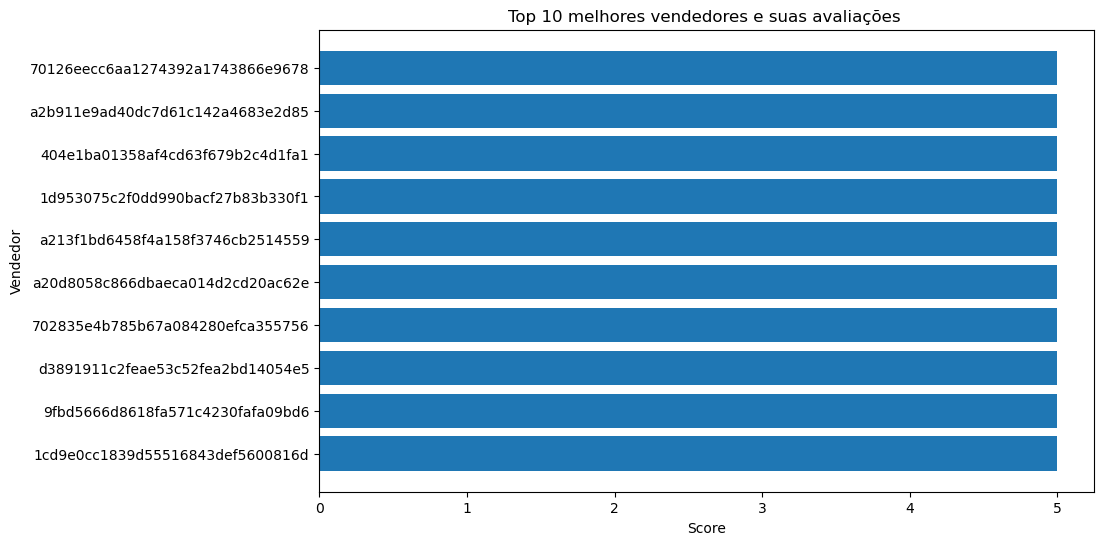

In [8]:
# Criando o gráfico para os vendedores com melhor avaliação
plt.figure(figsize=(10, 6))
plt.barh(score['seller_id'], score['review_score'])
plt.title('Top 10 melhores vendedores e suas avaliações ')
plt.xlabel('Score')
plt.ylabel('Vendedor')
plt.savefig('Top 10 melhores vendedores e suas avaliações')
plt.show()

In [9]:
#Critério utilizado foi a média da nota que cada vendedor recebeu, sendo 5 a melhor e 1 a pior nota

In [10]:
#TOP 10 PIORES SELLERS (COM MAIS REVIEWS NEGATIVAS)
#Critério utilizado em ambas as formas foi a média da nota que cada vendedor recebeu, sendo 5 a melhor e 1 a pior nota

In [11]:
# Agrupando os dados pelo ID do vendedor e calcular a média da pontuação de avaliação
seller_scores = rev_item1.groupby('seller_id')['review_score'].mean()

# Ordenando os vendedores pela pontuação média em ordem decrescente
top_sellers = seller_scores.sort_values()

# Selecionando os top 10 vendedores
top_10_sellers1 = top_sellers.head(10)

print(top_10_sellers1)

seller_id
6d04126aba80df143fd038e711b8fd96    1.0
b6c6854d4d92a5f6f46be8869da3fa1a    1.0
34aefe746cd81b7f3b23253ea28bef39    1.0
b7ba853e9551f4558440881fd3e5c815    1.0
17adeba047385fb0c67d8e90b4296d21    1.0
e46bc031f2c5bae4ccb40bb90712e9b4    1.0
2a50b7ee5aebecc6fd0ff9784a4747d6    1.0
7e959205cebc10adefcb331f934238a4    1.0
0aa124728afc1131dff5655f4c6f487b    1.0
83d7070a0b9a8b4625fa8682b819fabb    1.0
Name: review_score, dtype: float64


In [12]:
# Transformando o dataframe que contém series de score em dataframe com colunas
score_neg = pd.DataFrame(top_10_sellers1).reset_index()
score_neg.columns = ['seller_id', 'review_score']

score_neg

,seller_id,review_score
0,6d04126aba80df143fd038e711b8fd96,1.0
1,b6c6854d4d92a5f6f46be8869da3fa1a,1.0
2,34aefe746cd81b7f3b23253ea28bef39,1.0
3,b7ba853e9551f4558440881fd3e5c815,1.0
4,17adeba047385fb0c67d8e90b4296d21,1.0
5,e46bc031f2c5bae4ccb40bb90712e9b4,1.0
6,2a50b7ee5aebecc6fd0ff9784a4747d6,1.0
7,7e959205cebc10adefcb331f934238a4,1.0
8,0aa124728afc1131dff5655f4c6f487b,1.0
9,83d7070a0b9a8b4625fa8682b819fabb,1.0


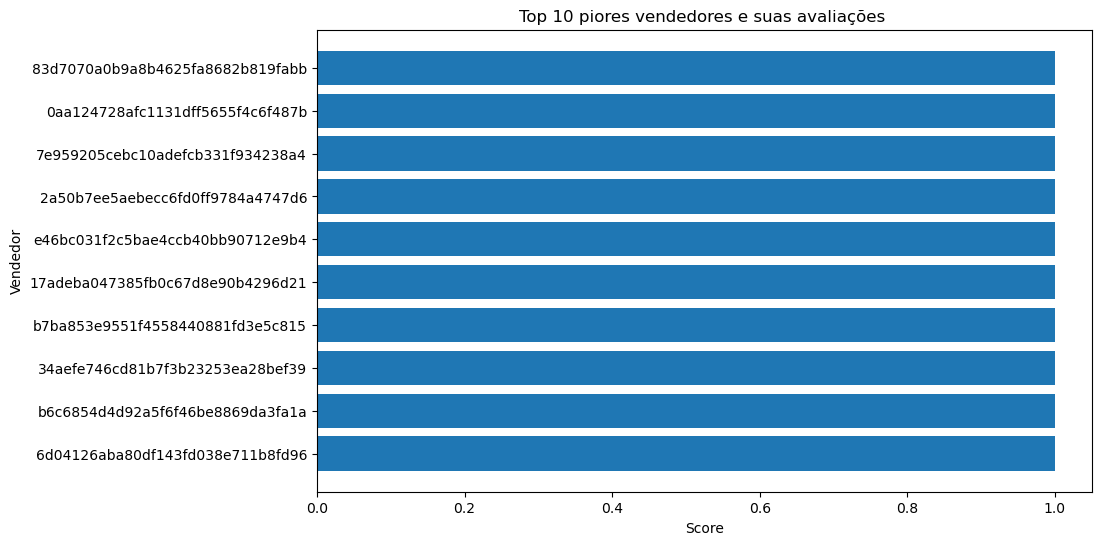

In [14]:
# Criando o gráfico para os vendedores com pior avaliação
plt.figure(figsize=(10, 6))
plt.barh(score_neg['seller_id'], score_neg['review_score'])
plt.title('Top 10 piores vendedores e suas avaliações ')
plt.xlabel('Score')
plt.ylabel('Vendedor')
plt.savefig('Top 10 piores vendedores e suas avaliações')
plt.show()